In [1]:
%pylab qt4

Populating the interactive namespace from numpy and matplotlib


In [41]:
from scipy.optimize import leastsq
from scipy.ndimage.filters import  gaussian_filter

In [267]:
import slideTomography_1d as tm
reload(tm);

## Create tomagrapher instance with a specified sweet spot

In [500]:
swSptSize    = 40
swSptPadding = 5

sweetSpot = zeros([swSptSize+2*swSptPadding])
sweetSpot[swSptPadding:-swSptPadding] = 1.

t1d = tm.Tomography_1D(gaussian_filter(sweetSpot,5))

smpSize    = 10000
smpPadding = 100

calSmp  = zeros([smpSize])
calSmp[smpPadding:-smpPadding] = 1

sg = 20
smp = gaussian_filter(smp,sg)

t1d.calibrate(smp)

### Random Sample

In [491]:
# Sine function

smp  = zeros([smpSize])
smp[smpPadding:-smpPadding] =  sin(linspace(0,2*pi,smpSize-2*smpPadding))
smp = gaussian_filter(smp,sg)

signal = t1d.calcSignal(smp)

In [492]:
# Sine function

smp  = zeros([smpSize])

smp[smpPadding:-smpPadding] =  gaussian_filter(rand(smpSize-2*smpPadding)>0.2,2)
smp = gaussian_filter(smp,sg)

signal = t1d.calcSignal(smp)

In [501]:
rec = t1d.reconstruct(signal)

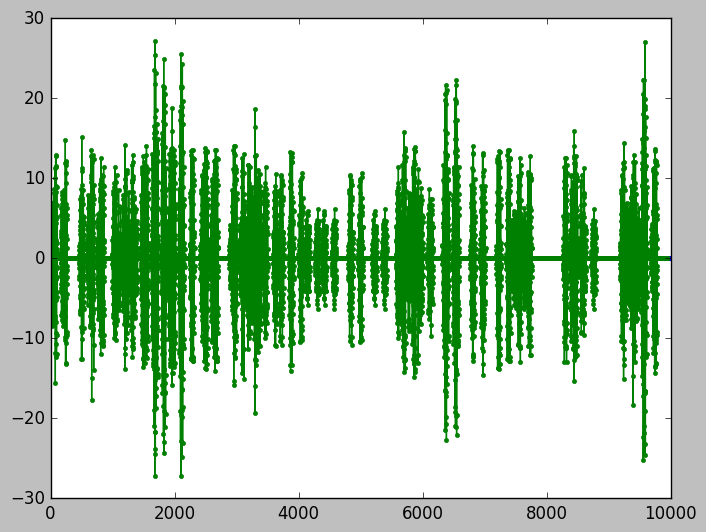

In [502]:
clf()
plot(arange(smp.shape[0]),smp,".-")
plot(arange(rec.shape[0])+(swSptSize/2+swSptPadding),rec,".-")
display(gcf())

In [457]:
t1d._sweetSpot.__class__

numpy.ndarray